In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df2=pd.read_csv("DelayedFlights.csv")
print(df2.head(3))

   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN           NaN      NaN   
1                 N         0           NaN           NaN      NaN   
2                 N         0           NaN           NaN      NaN   

  SecurityDelay  LateAircraftDelay  
0           NaN                NaN  
1           NaN                NaN  
2           NaN       

# Exercici 1
### Variable categòrica UniqueCarrier

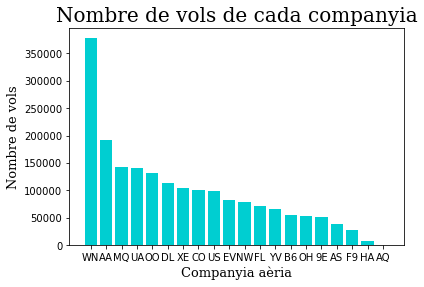

In [7]:
dades = df2["UniqueCarrier"].value_counts().reset_index()
x=dades.iloc[:,0]
y=dades.iloc[:,1]
#print(x,y)
plt.bar(x,y,color = 'darkturquoise')
font1 = {'family':'serif','size':20}
font2 = {'family':'serif','size':13}
plt.title("Nombre de vols de cada companyia", fontdict = font1, loc="center")
plt.xlabel("Companyia aèria", fontdict = font2)
plt.ylabel("Nombre de vols", fontdict = font2)
plt.savefig('UniqueCarrier.png',bbox_inches='tight')

### Variable numèrica ArrDelay i DepDelay

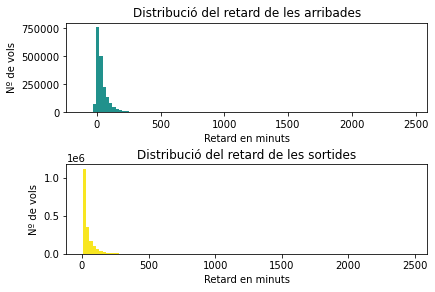

In [9]:
x1=df2["ArrDelay"]
plt.subplot(2, 1, 1)
plt.hist(x1, bins=100, color=plt.cm.viridis(0.5))
plt.title("Distribució del retard de les arribades", loc="center")
plt.ylabel("Nº de vols")
plt.xlabel("Retard en minuts")

x2=df2["DepDelay"]
plt.subplot(2, 1, 2)
plt.hist(x2, bins=100, color=plt.cm.viridis(0.99))
plt.title("Distribució del retard de les sortides", loc="center")
plt.ylabel("Nº de vols")
plt.xlabel("Retard en minuts")
plt.tight_layout(pad=0.5)

plt.savefig('ArrDelay&DepDelay.png',bbox_inches='tight')

### Variable numèrica i categòrica ArrDelay i UniqueCarrier

D:\Plant\Programes\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Plant\Programes\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


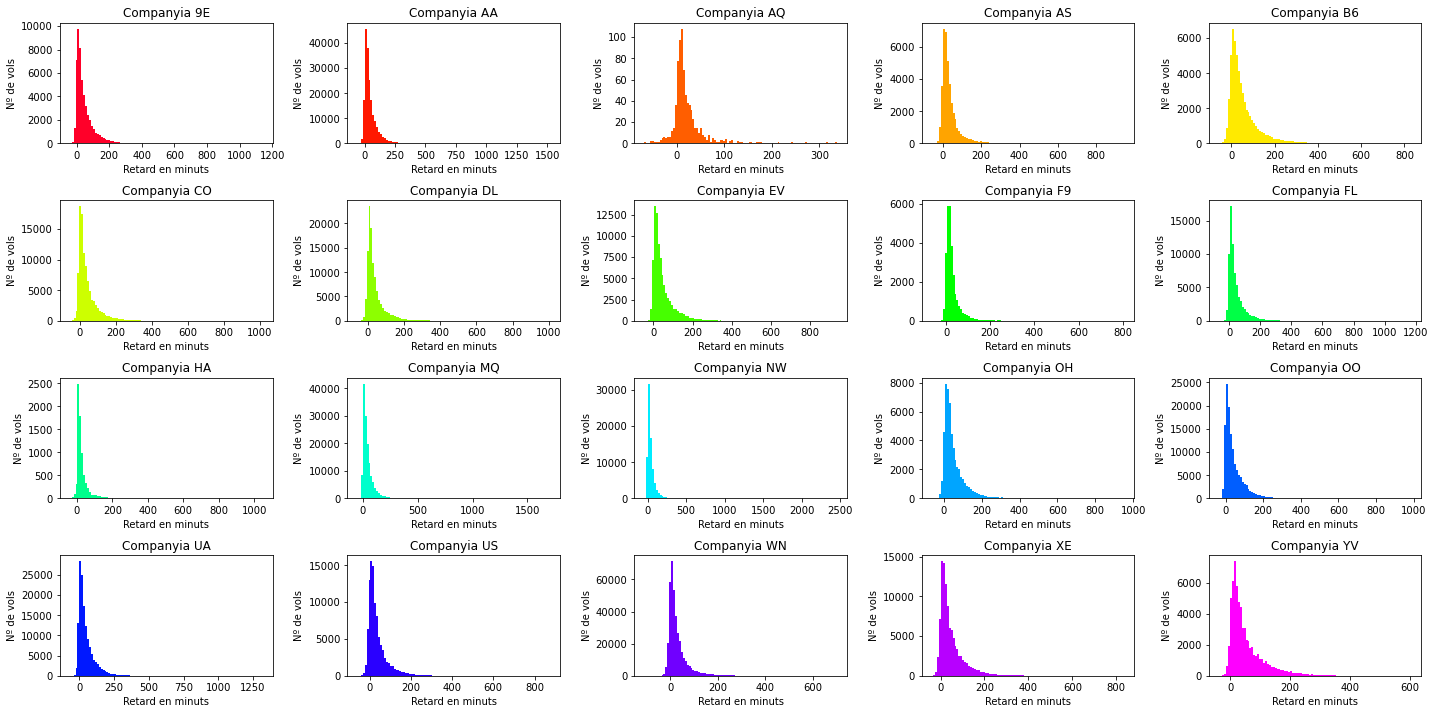

In [79]:
groups = df2.groupby('UniqueCarrier')
i=0
plt.rcParams["figure.figsize"] = (20,10)

for name, group in groups:
    #print(name, group)
    plt.subplot(4, 5, i+1)
    plt.hist(group["ArrDelay"], bins=100, color=plt.cm.gist_rainbow((i)/20))
    plt.title("Companyia "+name, loc="center")
    plt.ylabel("Nº de vols")
    plt.xlabel("Retard en minuts")
    i+=1
plt.tight_layout(pad=1)
plt.savefig('ArrDelay_UniqueCarrier.png')

### ArrDelay i UniqueCarrier

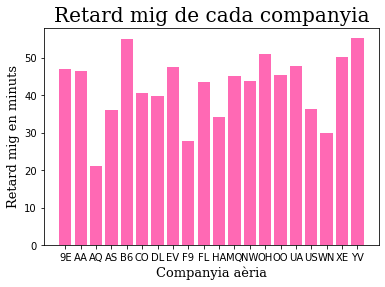

In [10]:
dades=df2.groupby("UniqueCarrier")["ArrDelay"].mean().reset_index()
x=dades.iloc[:,0]
y=dades.iloc[:,1]
plt.bar(x,y,color = 'hotpink')
font1 = {'family':'serif','size':20}
font2 = {'family':'serif','size':13}
plt.title("Retard mig de cada companyia", fontdict = font1, loc="center")
plt.xlabel("Companyia aèria", fontdict = font2)
plt.ylabel("Retard mig en minuts", fontdict = font2)

plt.savefig('UniqueCarrier_ArrDelay.png',bbox_inches='tight')

### Dues variables numèriques ArrDelay i UniqueCarrier

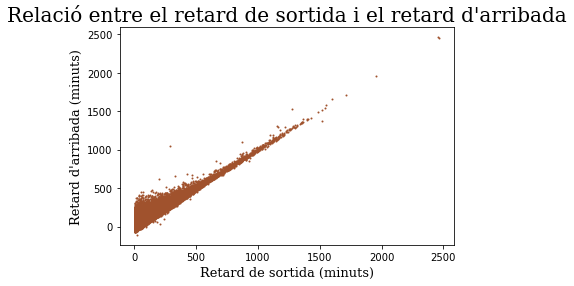

In [11]:
plt.scatter(x=df2["DepDelay"],y=df2["ArrDelay"], s=1, c="sienna")
font1 = {'family':'serif','size':20}
font2 = {'family':'serif','size':13}
plt.title("Relació entre el retard de sortida i el retard d'arribada", fontdict = font1, loc="center")
plt.xlabel("Retard de sortida (minuts)", fontdict = font2)
plt.ylabel("Retard d'arribada (minuts)", fontdict = font2)

plt.savefig('scatter_plot.png',bbox_inches='tight')

### Tres variables ArrDelay, DepDelay i UniqueCarrier

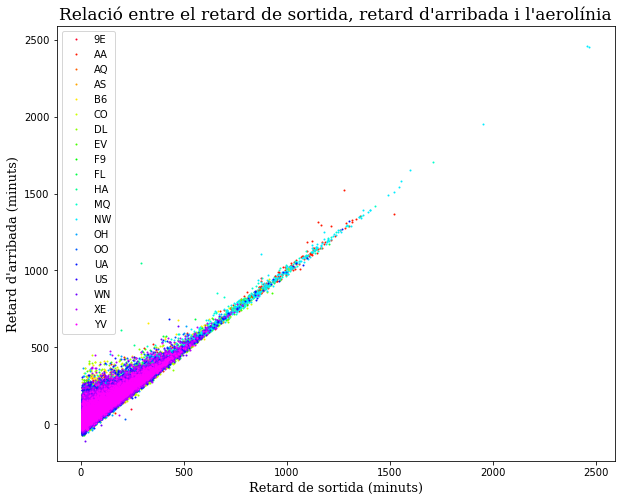

In [14]:
groups = df2.groupby('UniqueCarrier')
i=0
plt.rcParams["figure.figsize"] = (10,8)
for name, group in groups:
    #print(name, group)
    plt.plot(group["DepDelay"], group["ArrDelay"], marker='o', linestyle='', markersize=1, label=name, color=plt.cm.gist_rainbow((i)/20))
    i+=1

plt.legend()
font1 = {'family':'serif','size':17}
font2 = {'family':'serif','size':13}
plt.title("Relació entre el retard de sortida, retard d'arribada i l'aerolínia", fontdict = font1, loc="center")
plt.xlabel("Retard de sortida (minuts)", fontdict = font2)
plt.ylabel("Retard d'arribada (minuts)", fontdict = font2)

plt.savefig('Scatter_plot2.png',bbox_inches='tight')

### Quatre variables ArrDelay, DepDelay, AirTime i UniqueCarrier

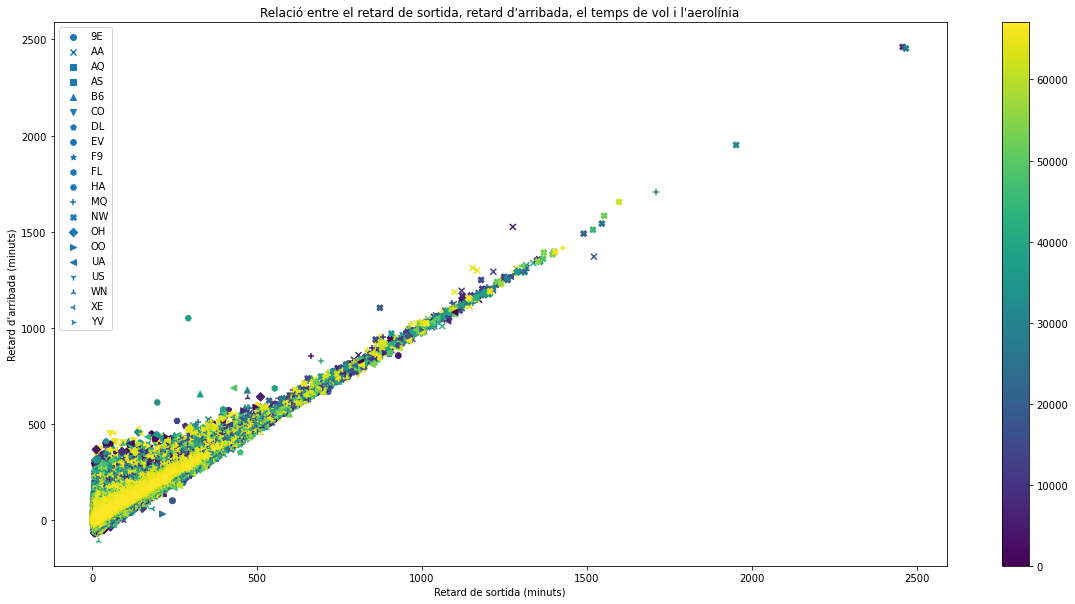

In [22]:
groups = df2.groupby('UniqueCarrier')
i=0
m=['o','x','s',',','^','v','p','8','*','h','H','+','X','D','>','<','1','2','3','4']
plt.rcParams["figure.figsize"] = (20,10)
for name, group in groups:
    #print(name, group)
    colors=[]
    for j in range(group["DepDelay"].size):
        colors.append(j)
    plt.scatter(group["DepDelay"], group["ArrDelay"], marker=m[i], label=name, c=colors, cmap='viridis')
    i+=1

plt.legend()
plt.colorbar()
plt.title("Relació entre el retard de sortida, retard d'arribada, el temps de vol i l'aerolínia", loc="center")
plt.xlabel("Retard de sortida (minuts)")
plt.ylabel("Retard d'arribada (minuts)")
plt.savefig('Scatter_plot3.png',bbox_inches='tight')

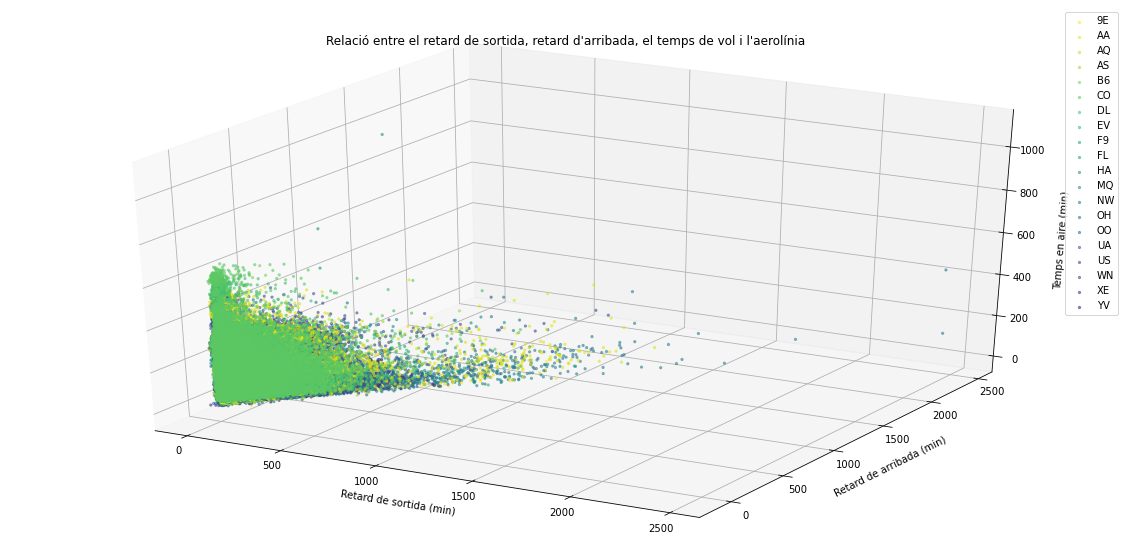

In [23]:
ax = plt.axes(projection='3d')
colors=[0,0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
groups = df2.groupby('UniqueCarrier')
i=0
plt.rcParams["figure.figsize"] = (20,10)
for name,group in groups:
    ax.scatter3D(group["DepDelay"], group["ArrDelay"], group["AirTime"], color=plt.cm.viridis_r(colors[i]),s=5, label = name, alpha=0.5)
    i+=1
plt.legend()
plt.title("Relació entre el retard de sortida, retard d'arribada, el temps de vol i l'aerolínia", loc="center")
ax.set_xlabel('Retard de sortida (min)', labelpad=10)
ax.set_ylabel('Retard de arribada (min)', labelpad=10)
ax.set_zlabel('Temps en aire (min)', labelpad=10)
plt.savefig('Scatter_plot4.png',bbox_inches='tight')

# Exercici 2
### Exportar els grafics com a imatges amb plt.savefig()

# Exercici 3
### Integrar les visualitzacions gràfiques en la tasca 5 del sprint 2

In [3]:
estadistics = df2.describe()
print(estadistics)

         Unnamed: 0       Year         Month    DayofMonth     DayOfWeek  \
count  1.936758e+06  1936758.0  1.936758e+06  1.936758e+06  1.936758e+06   
mean   3.341651e+06     2008.0  6.111106e+00  1.575347e+01  3.984827e+00   
std    2.066065e+06        0.0  3.482546e+00  8.776272e+00  1.995966e+00   
min    0.000000e+00     2008.0  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.517452e+06     2008.0  3.000000e+00  8.000000e+00  2.000000e+00   
50%    3.242558e+06     2008.0  6.000000e+00  1.600000e+01  4.000000e+00   
75%    4.972467e+06     2008.0  9.000000e+00  2.300000e+01  6.000000e+00   
max    7.009727e+06     2008.0  1.200000e+01  3.100000e+01  7.000000e+00   

            DepTime    CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  1.936758e+06  1.936758e+06  1.929648e+06  1.936758e+06  1.936758e+06   
mean   1.518534e+03  1.467473e+03  1.610141e+03  1.634225e+03  2.184263e+03   
std    4.504853e+02  4.247668e+02  5.481781e+02  4.646347e+02  1.944702e+03   

Distribució del temps de retard de sortida

Text(0, 0.5, 'Nombre de vols')

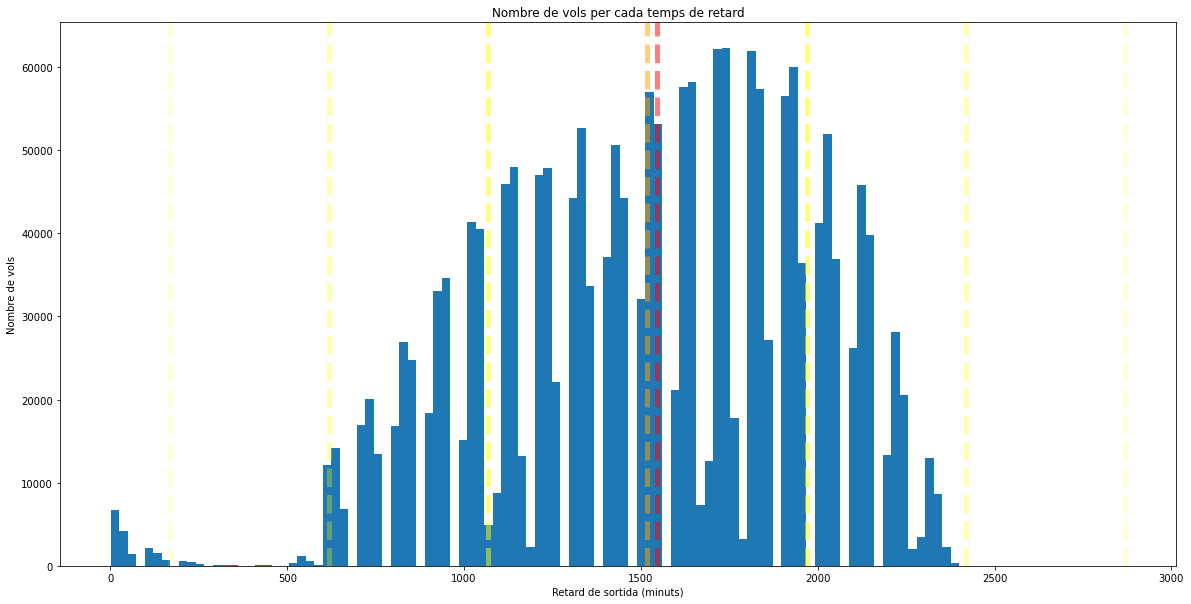

In [12]:

plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df2['DepTime'],bins=100)
plt.axvline(estadistics.loc['mean','DepTime'], color='orange', alpha=0.5, linestyle='dashed', linewidth=5)
std_inferior1=estadistics.loc['mean','DepTime']-estadistics.loc['std','DepTime']
std_inferior2=estadistics.loc['mean','DepTime']-2*estadistics.loc['std','DepTime']
std_inferior3=estadistics.loc['mean','DepTime']-3*estadistics.loc['std','DepTime']
std_superior1=estadistics.loc['mean','DepTime']+estadistics.loc['std','DepTime']
std_superior2=estadistics.loc['mean','DepTime']+2*estadistics.loc['std','DepTime']
std_superior3=estadistics.loc['mean','DepTime']+3*estadistics.loc['std','DepTime']
plt.axvline(std_inferior1, color='yellow', alpha=0.5, linestyle='dashed', linewidth=5)
plt.axvline(std_inferior2, color='yellow', alpha=0.3, linestyle='dashed', linewidth=5)
plt.axvline(std_inferior3, color='yellow', alpha=0.15, linestyle='dashed', linewidth=5)
plt.axvline(std_superior1, color='yellow', alpha=0.5, linestyle='dashed', linewidth=5)
plt.axvline(std_superior2, color='yellow', alpha=0.3, linestyle='dashed', linewidth=5)
plt.axvline(std_superior3, color='yellow', alpha=0.15, linestyle='dashed', linewidth=5)
plt.axvline(df2['DepTime'].median(), color='red', alpha=0.5, linestyle='dashed', linewidth=5)
plt.title("Nombre de vols per cada temps de retard", loc="center")
plt.xlabel("Retard de sortida (minuts)")
plt.ylabel("Nombre de vols")

Box plots de temps de vol, temps de sortida i arribada, temps de retard i distancia dels vols.

Text(0.5, 0, 'Distance')

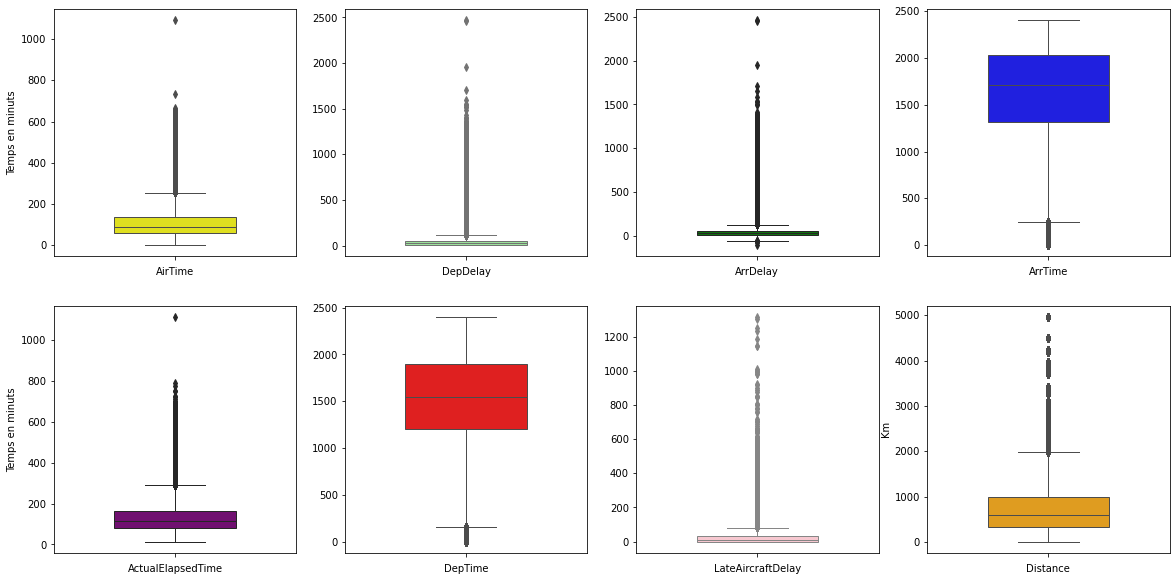

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
#df2[['DepTime','ArrTime', 'AirTime','DepDelay','ArrDelay','ActualElapsedTime']].plot(kind='box', title='Boxplots dels temps de retard i de vol')
plt.subplot(2, 4, 1)
sns.boxplot(y='AirTime', data=df2,  color='yellow', fliersize=5,  orient='v', linewidth=1 , width=0.5);
plt.ylabel('Temps en minuts')
plt.xlabel('AirTime')
plt.subplot(2, 4, 2)
sns.boxplot(y='DepDelay', data=df2,  color='lightgreen', fliersize=5,  orient='v', linewidth=1 , width=0.5);
plt.ylabel('')
plt.xlabel('DepDelay')
plt.subplot(2, 4, 3)
sns.boxplot(y='ArrDelay', data=df2,  color='green', fliersize=5,  orient='v', linewidth=1 , width=0.5);
plt.ylabel('')
plt.xlabel('ArrDelay')
plt.subplot(2, 4, 4)
sns.boxplot(y='ArrTime', data=df2,  color='blue', fliersize=5,  orient='v', linewidth=1 , width=0.5);
plt.ylabel('')
plt.xlabel('ArrTime')
plt.subplot(2, 4, 5)
sns.boxplot(y='ActualElapsedTime', data=df2,  color='purple', fliersize=5,  orient='v', linewidth=1 , width=0.5);
plt.ylabel('Temps en minuts')
plt.xlabel('ActualElapsedTime')
plt.subplot(2, 4, 6)
sns.boxplot(y='DepTime', data=df2,  color='red', fliersize=5,  orient='v', linewidth=1 , width=0.5);
plt.ylabel('')
plt.xlabel('DepTime')
plt.subplot(2, 4, 7)
sns.boxplot(y='LateAircraftDelay', data=df2,  color='pink', fliersize=5,  orient='v', linewidth=1 , width=0.5);
plt.ylabel('')
plt.xlabel('LateAircraftDelay')
plt.subplot(2, 4, 8)
sns.boxplot(y='Distance', data=df2,  color='orange', fliersize=5,  orient='v', linewidth=1 , width=0.5);
plt.ylabel('Km')
plt.xlabel('Distance')


Relació entre els temps de sortida i d'arribada teòrics i reals

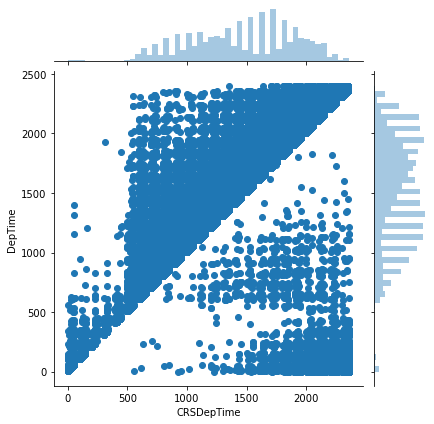

In [20]:
sns.jointplot(data=df2, x="CRSDepTime", y="DepTime")

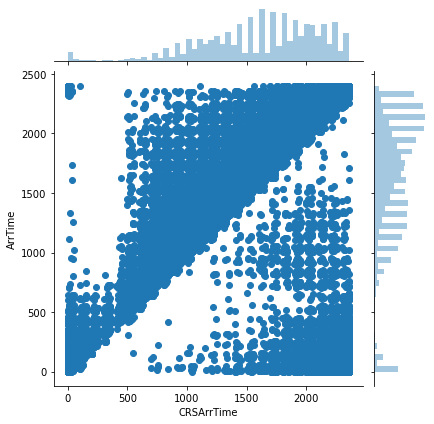

In [21]:
sns.jointplot(data=df2, x="CRSArrTime", y="ArrTime")

Missing data de cada variable:

Text(0, 0.5, 'nº de missing data')

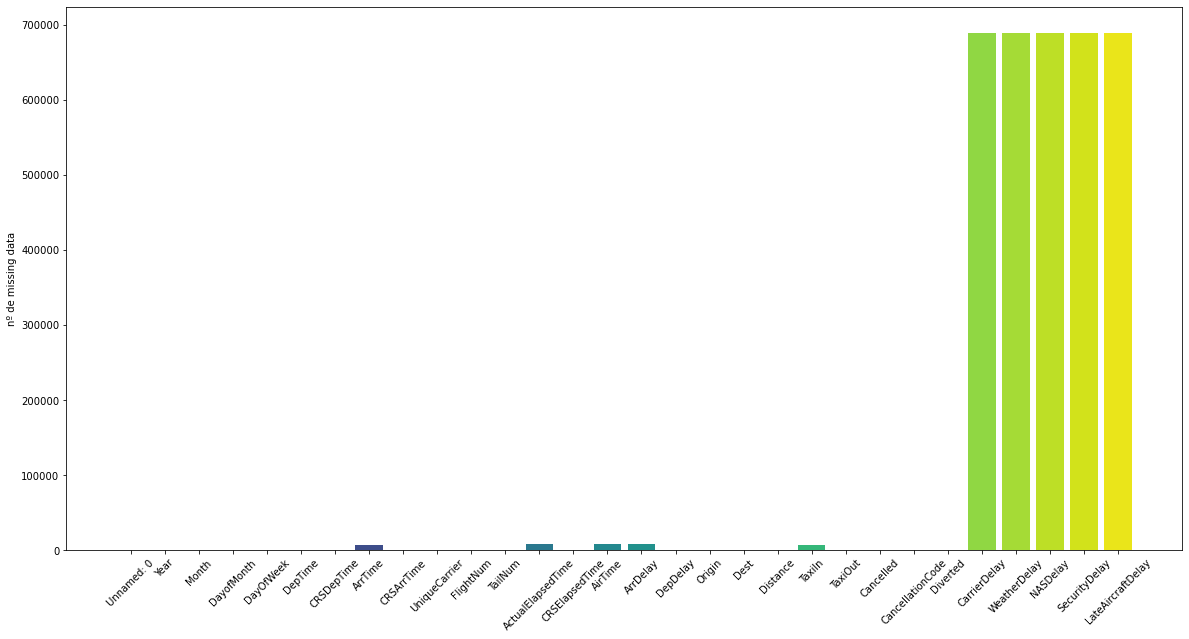

In [17]:
colors=[]
for j in range(100):
    colors.append(j/30)
for i in range(df2.columns.size):
    plt.bar(df2.columns[i],df2.iloc[:,i].isnull().sum(),color=plt.cm.viridis(colors[i]))
plt.xticks(rotation=45)
plt.ylabel('nº de missing data')

Box plot de la velocitat mitja dels vols de cada companyia

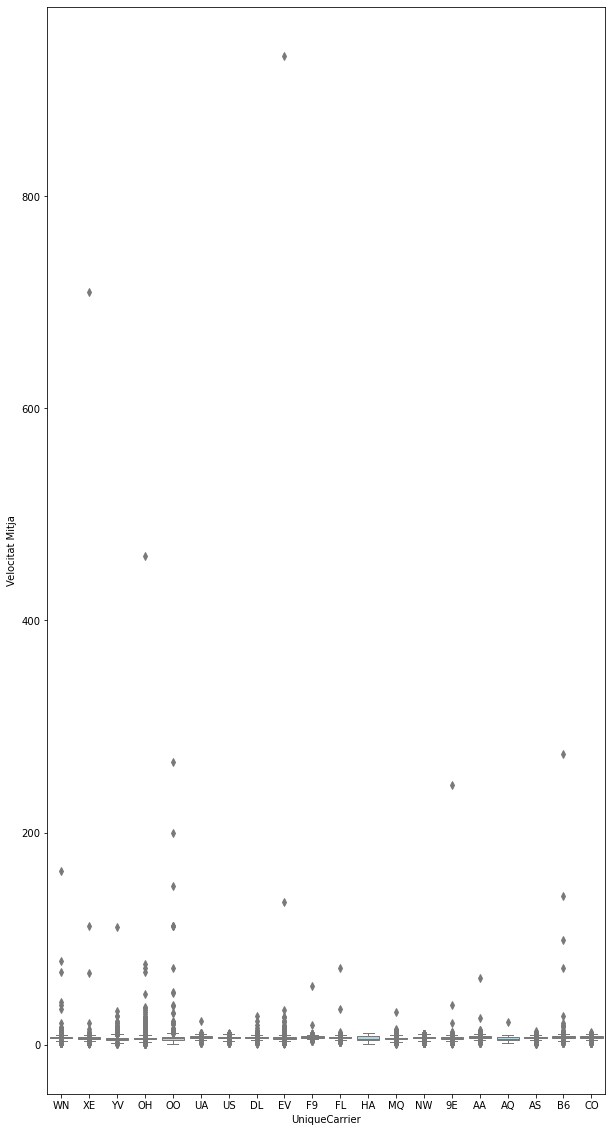

In [22]:
df = df2.copy()
df['Velocitat Mitja'] = df["Distance"]/df['AirTime']
plt.rcParams["figure.figsize"] = (10,20)
sns.boxplot(y='Velocitat Mitja', x='UniqueCarrier', data=df,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.8);